In [1]:
import keras
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
#"C:/Users/vikas/kagglecatsanddogs_5340/PetImages/"
base_dir = 'C:/Users/vikas/kagglecatsanddogs_5340/PetImages/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
#create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

Found 18821 images belonging to 2 classes.
Found 4698 images belonging to 2 classes.


In [4]:
#build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
#train the model
history = model.fit(
    train_generator,
    steps_per_epoch=188,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.5079 - loss: 0.6967 - val_accuracy: 0.5240 - val_loss: 0.6884
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.5312 - loss: 0.6874 - val_accuracy: 0.5640 - val_loss: 0.6906
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.5528 - loss: 0.6878 - val_accuracy: 0.6120 - val_loss: 0.6816
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.5595 - loss: 0.6847 - val_accuracy: 0.6380 - val_loss: 0.6285
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - accuracy: 0.6197 - loss: 0.6585 - val_accuracy: 0.6220 - val_loss: 0.6585
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.6463 - loss: 0.6378 - val_accuracy: 0.6320 - val_loss: 0.6405
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.6743 - loss: 0.6259 - val_accuracy: 0.6820 - val_loss: 0.6050
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.6797 - loss: 0.613

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6335 - loss: 0.6104 - val_accuracy: 0.7240 - val_loss: 0.5565
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.7201 - loss: 0.5587 - val_accuracy: 0.6880 - val_loss: 0.5915
Epoch 13/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.7342 - loss: 0.5375 - val_accuracy: 0.7440 - val_loss: 0.5190
Epoch 14/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.7488 - loss: 0.5277 - val_accuracy: 0.7380 - val_loss: 0.5134
Epoch 15/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.7492 - loss: 0.5256 - val_accuracy: 0.7180 - val_loss: 0.5709
Epoch 16/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.7508 - loss: 0.5095 - val_accuracy: 0.7420 - val_loss: 0.5386
Epoch 17/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.7437 - loss: 0.5425 - val_accuracy: 0.7400 - val_loss: 0.5013
Epoch 18/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.7552 - loss: 

188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.9100 - loss: 0.2227 - val_accuracy: 0.8520 - val_loss: 0.3724
Epoch 61/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.8893 - loss: 0.2769 - val_accuracy: 0.8600 - val_loss: 0.3394
Epoch 62/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.9172 - loss: 0.2212 - val_accuracy: 0.8520 - val_loss: 0.3743
Epoch 63/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.9027 - loss: 0.2298 - val_accuracy: 0.8620 - val_loss: 0.3455
Epoch 64/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.9099 - loss: 0.2202 - val_accuracy: 0.8500 - val_loss: 0.3626
Epoch 65/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 195ms/step - accuracy: 0.9026 - loss: 0.2274 - val_accuracy: 0.8820 - val_loss: 0.3383
Epoch 66/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9668 - loss: 0.1684 - val_accuracy: 0.8460 - val_loss: 0.3889
Epoch 67/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.9098 - loss: 

In [7]:
import matplotlib.pyplot as plt

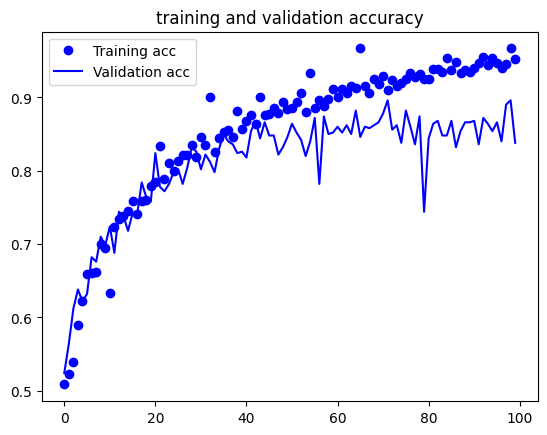

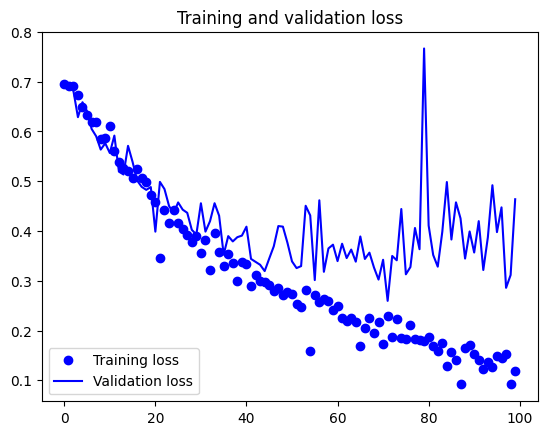

In [8]:
#evaluate the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
#predicting a image
from tensorflow.keras.preprocessing import image

In [10]:
# Path to the image you want to predict
img_path = 'C:/Users/vikas/kagglecatsanddogs_5340/PetImages/validation/cats/10002.jpg'  # Change to your image path

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's expected input shape
img_array = np.expand_dims(img_array, axis=0)

# Rescale the image
img_array /= 255.0

In [11]:
#pridiction
# Predict the class
prediction = model.predict(img_array)

# Print the prediction result
if prediction[0] > 0.5:
    print("This image is a dog")
else:
    print("This image is a cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
This image is a cat


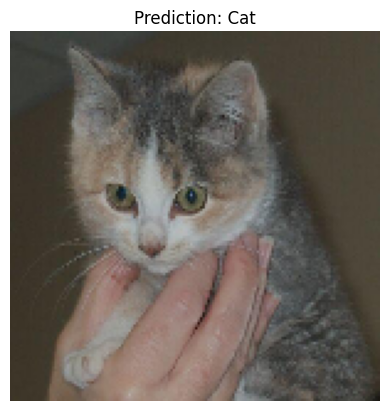

In [12]:
# Display the image
plt.imshow(img)
plt.title("Prediction: Dog" if prediction[0] > 0.5 else "Prediction: Cat")
plt.axis('off')
plt.show()